In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
dp=pd.read_csv('C:\\Users\\hp\\Desktop\\FODS_2\\FODS-A2.csv')

In [3]:
dp=(dp-dp.mean())/dp.std()

In [4]:
train_dp=dp.sample(frac=0.8, random_state=90)
test_dp=dp.drop(train_dp.index)

In [5]:
x_train=train_dp.iloc[:,0:26]
x_test=test_dp.iloc[:,0:26]
y_train=train_dp.iloc[:,-1]
y_test=test_dp.iloc[:,-1]

In [6]:
def calc_weights(x,y):
    weights=np.ones((x.shape[1],1))
    product=np.dot(x.T,x)
    inverse_matrix=np.linalg.inv(product)
    prod=np.dot(inverse_matrix,x.T)
    weights=np.dot(prod,y)
    return weights

In [7]:
def model_error(x,subset,y):   
    x=x.iloc[:,subset]
    weights=calc_weights(x,y)
    n=len(x)
    error=(1/(2*n))*np.sum(np.square(y-np.dot(x,weights)))
    return error

In [8]:
subset=[]
forward_training=[]
error_list=[]
final_error=model_error(test_dp,[0],y_test)+1

In [9]:
for j in range(26):
    tobeadded=-1
    for i in range(26): 
        temp_copy = subset.copy()
        if (i not in temp_copy):
            temp_copy.append(i)
            temp_error=model_error(test_dp,temp_copy,y_test)
            temp_list=[]
            temp_list.append(temp_copy)
            temp_list.append(temp_error)
            error_list.append(temp_list)
            if(temp_error<=final_error):
                final_error=temp_error
                tobeadded=i
    if(tobeadded!=-1):
        subset.append(tobeadded)
        forward_training.append(final_error)

In [10]:
error_list

[[[0], 0.5025093982122935],
 [[1], 0.5017582283494939],
 [[2], 0.49696174048681274],
 [[3], 0.5008816758760465],
 [[4], 0.4982096788059906],
 [[5], 0.5040033225281287],
 [[6], 0.5028221969764862],
 [[7], 0.5038352639529051],
 [[8], 0.5037518073623489],
 [[9], 0.5039495870292611],
 [[10], 0.49647244224215575],
 [[11], 0.49768553473013827],
 [[12], 0.5033714435256411],
 [[13], 0.5004354237493781],
 [[14], 0.5022684907858592],
 [[15], 0.4992604165629569],
 [[16], 0.5037397376313115],
 [[17], 0.5024089667155535],
 [[18], 0.4991217675422161],
 [[19], 0.5037625635014326],
 [[20], 0.49005330524602564],
 [[21], 0.5030469202844338],
 [[22], 0.5039961495674716],
 [[23], 0.5040078672315862],
 [[24], 0.5039461299403227],
 [[25], 0.5039461299403227],
 [[20, 0], 0.4900459113008325],
 [[20, 1], 0.4826694827488317],
 [[20, 2], 0.48899079109570537],
 [[20, 3], 0.4897902140880984],
 [[20, 4], 0.48772389594587046],
 [[20, 5], 0.48787811990393093],
 [[20, 6], 0.4899722821982628],
 [[20, 7], 0.489040080017

In [11]:
graph_list=[]
x_list=[]
for i in range(351):
    graph_list.append(error_list[i][1])
    x_list.append(i)

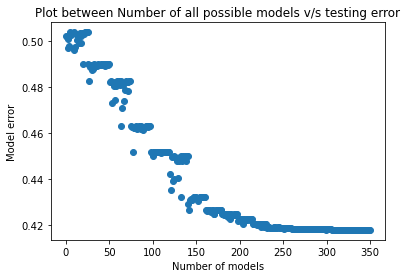

In [12]:
plt.scatter(x_list,graph_list)
plt.xlabel("Number of models")
plt.ylabel("Model error")
plt.title("Plot between Number of all possible models v/s testing error")
plt.show()